In [39]:
#import the rewuired libraries
import gensim
from gensim import corpora

In [40]:
#the following is our corpus
texts = [['bank','river','shore','water'],
        ['river','water','flow','fast','tree'],
        ['bank','water','fall','flow'],
        ['bank','bank','water','rain','river'],
        ['river','water','mud','tree'],
        ['money','transaction','bank','finance'],
        ['bank','borrow','money'], 
        ['bank','finance'],
        ['finance','money','sell','bank'],
        ['borrow','sell'],
        ['bank','loan','sell']]

**Our corpus consists of documents belongign to two different topics. Their first topic is 'RIVERS' and the second topic is 'Finance'. Now in our corpus we have a word 'BANKS' which belongs to both the topics. Let's build a topic model on our corpus.**

In [41]:
dictionery = corpora.Dictionary(texts)
print(dictionery.token2id)

{'bank': 0, 'river': 1, 'shore': 2, 'water': 3, 'fast': 4, 'flow': 5, 'tree': 6, 'fall': 7, 'rain': 8, 'mud': 9, 'finance': 10, 'money': 11, 'transaction': 12, 'borrow': 13, 'sell': 14, 'loan': 15}


In [42]:
corpus = [dictionery.doc2bow(text) for text in texts]#creating our corpus

In [43]:
len(corpus)

11

In [44]:
for doc in corpus:
    print(doc)

[(0, 1), (1, 1), (2, 1), (3, 1)]
[(1, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
[(0, 1), (3, 1), (5, 1), (7, 1)]
[(0, 2), (1, 1), (3, 1), (8, 1)]
[(1, 1), (3, 1), (6, 1), (9, 1)]
[(0, 1), (10, 1), (11, 1), (12, 1)]
[(0, 1), (11, 1), (13, 1)]
[(0, 1), (10, 1)]
[(0, 1), (10, 1), (11, 1), (14, 1)]
[(13, 1), (14, 1)]
[(0, 1), (14, 1), (15, 1)]


### LDA MODEL

In [45]:
#LDA MODEL
from gensim.models import ldamodel
model = ldamodel.LdaModel(corpus, num_topics = 2, id2word = dictionery)

In [46]:
model.show_topics()

[(0,
  '0.232*"bank" + 0.098*"money" + 0.085*"sell" + 0.079*"water" + 0.077*"finance" + 0.059*"borrow" + 0.058*"river" + 0.054*"flow" + 0.045*"loan" + 0.045*"transaction"'),
 (1,
  '0.143*"water" + 0.129*"river" + 0.111*"bank" + 0.094*"tree" + 0.064*"finance" + 0.057*"shore" + 0.056*"mud" + 0.054*"fast" + 0.054*"sell" + 0.054*"flow"')]

**From the above output of the LdaModel you can observe that the word 'BANK' is important in both the topics.**

### get_term_topics

The function ***get_term_topics*** returns the odds of a particular word to be present in a particular topic. Let's see the examples 

In [9]:
print(model.get_term_topics('water')) #gives the probability of the word belonging to a particular topic

[(0, 0.090843804), (1, 0.092385285)]


As you can see the chances of the word 'water' being present is high in the topic 1 as compared to other topic which makes sense.

In [10]:
print(model.get_term_topics('transaction'))

[(0, 0.029522339)]


In [11]:
print(model.get_term_topics('BANK'.lower()))

[(0, 0.21803921), (1, 0.0923976)]


### get_document_topics

This functionality of gensim helps us in identifying topic distribution of each word in out documents.

In [12]:
water_bow = ['bank', 'water', 'bank']
finance_bow = ['bank', 'finance', 'bank']

In [13]:
#convert to BOW format first
bow_w = model.id2word.doc2bow(water_bow)

doc_topics, word_topics, phi_values = model.get_document_topics(bow_w, per_word_topics = True)

In [14]:
word_topics

[(0, [0, 1]), (3, [0, 1])]

In [15]:
doc_topics #gives the porbability of words belonging to a certain topics.

[(0, 0.8346638), (1, 0.16533616)]

**Let's interpret the above output. The above output means that just like the word_type 1 our word_type 3 (which is word 'BANK'), is likely to be  present in the topic 1 ans compared to topic 2. The first number in the above output (i.e 0 and 3) are nothing but the word_type and the list following the word_type is the sorted list, dipicting to which topic the words belong to. In this case the word 'BANK' is likely to be present in the topic 1 than topic 2.**

In [16]:
print(phi_values) #gives the probability of the words belonging to a particular topics

[(0, [(0, 1.9247402), (1, 0.075258605)]), (3, [(0, 0.9142132), (1, 0.08578532)])]


In [17]:
#let's do the same on the finance_bow
#first covert it to the BOW model
bow_f = model.id2word.doc2bow(finance_bow)

doc_topics, word_topics, phi_values = model.get_document_topics(bow_f, per_word_topics = True)

In [18]:
print(word_topics)

[(0, [0, 1]), (10, [0, 1])]


**Here the prossibility of the word 'BANK' belonging to a particular document has changed as compared to the previous output. Here the word 'BANK' is likely to be present in the topic 2 (i.e finance topic). We can conclude that the context of the words affect the liklyhood of a word to be classified in a particular topic.**

In [19]:
#getting document topcis for the entire corpus
all_topics = model.get_document_topics(corpus, per_word_topics = True)

for doc_topics, word_topics, phi_values in all_topics:
    print('NEW DOCUMENT \n')
    print('DOC_TOPICS : {}'.format(doc_topics))
    print('WORD_TOPICS : {}'.format(word_topics))
    print('PHI_VALUES : {}'.format(phi_values))
    print(100 * '-')

NEW DOCUMENT 

DOC_TOPICS : [(0, 0.58680665), (1, 0.41319332)]
WORD_TOPICS : [(0, [0, 1]), (1, [1, 0]), (2, [0, 1]), (3, [0, 1])]
PHI_VALUES : [(0, [(0, 0.78422993), (1, 0.21576925)]), (1, [(0, 0.47736922), (1, 0.52262884)]), (2, [(0, 0.5711073), (1, 0.42888612)]), (3, [(0, 0.6023075), (1, 0.397691)])]
----------------------------------------------------------------------------------------------------
NEW DOCUMENT 

DOC_TOPICS : [(0, 0.10788838), (1, 0.89211166)]
WORD_TOPICS : [(1, [1, 0]), (3, [1, 0]), (4, [1, 0]), (5, [1, 0]), (6, [1])]
PHI_VALUES : [(1, [(0, 0.02980887), (1, 0.9701898)]), (3, [(0, 0.04847522), (1, 0.95152354)]), (4, [(0, 0.01287522), (1, 0.9871211)]), (5, [(0, 0.046968725), (1, 0.95302796)]), (6, [(1, 0.99103475)])]
----------------------------------------------------------------------------------------------------
NEW DOCUMENT 

DOC_TOPICS : [(0, 0.8568776), (1, 0.14312245)]
WORD_TOPICS : [(0, [0, 1]), (3, [0, 1]), (5, [0, 1]), (7, [0, 1])]
PHI_VALUES : [(0, [(0, 0

You can also store all the doc_topics, word_topics and phi_values in the form of list and can later extract any document to see their various values by providing the index for the document. (example shown below)

In [20]:
topics = model.get_document_topics(corpus, per_word_topics = True)
all_topics = [(doc_topics, word_topics, phi_values) for doc_topics, word_topics, phi_values in topics]
#so here we have stored all the topic values in the list all_topics

#now you can provide the index of the document that you want to see.
doc_topics, word_topics, phi_values = all_topics[3] #we want to see the outputs of the document number 4
print('DOC_TOPICS : {}'.format(doc_topics))
print(100 * '-')
print('WORD_TOPICS : {}'.format(word_topics))
print(100 * '-')
print('PHI_VALUES : {}'.format(phi_values))

DOC_TOPICS : [(0, 0.8724471), (1, 0.12755294)]
----------------------------------------------------------------------------------------------------
WORD_TOPICS : [(0, [0, 1]), (1, [0, 1]), (3, [0, 1]), (8, [0, 1])]
----------------------------------------------------------------------------------------------------
PHI_VALUES : [(0, [(0, 1.9392241), (1, 0.060774684)]), (1, [(0, 0.8891192), (1, 0.11087857)]), (3, [(0, 0.9300495), (1, 0.069949105)]), (8, [(0, 0.9768283), (1, 0.023167105)])]


In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
texts1 = """Previously, we have discussed how we can use the Twitter API to stream tweets and store them in a relational
database. Now, we will use that information to perform sentiment analysis. But before that, we should take into 
consideration some things. First of all, we have streamed our tweets using the term ‘Avengers’ but without any extra 
consideration. It is highly likely that we have thousands of repeated tweets. In terms of sentiment analysis, processing 
them will not add any extra value and contrary, it will be computationally expensive. So, we need to access the database 
and delete duplicated tweets keeping the first occurrence. Second, we have an unlabeled database. For the model to 
learn during training, we should state if the tweets are positive or negative. The ideal solution would be to manually 
label the dataset, which is very accurate but requires a lot of time. However, there are several alternatives such as using a
n open-source dataset labeling tool such as Stanford CoreNLP."""

ex = WordCloud(stopwords = STOPWORDS).generate(texts1)

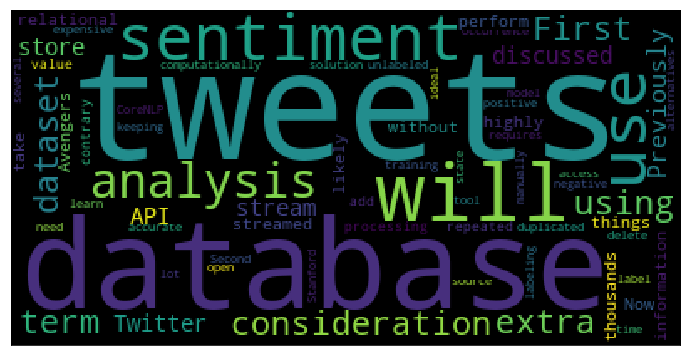

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.imshow(ex)
plt.xticks([])
plt.yticks([])
plt.show()

### WORD COLORING THE TOPICS

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [25]:
#we will be coloring the word red if it belongs to topics 1 and blue if it belongs to topics 0

In [35]:
def WordColoring(model, doc):
    
    #convert the doc into BOW model
    doc = model.id2word.doc2bow(doc)
    
    #get the document topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics = True)
    
    colors = {1 : 'red', 0 : 'blue'}
    
    #set the figure
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    
    word_pos = 1 / len(doc)
    
    for word, topic in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word], horizontalalignment = 'center', 
                verticalalignment = 'center', color = colors[topic[0]], transform = ax.transAxes, fontsize = 20)
        word_pos += 0.2
        
    ax.set_axis_off()
    plt.show()       

In [51]:
bow_water = ['bank', 'water', 'bank', 'tree']

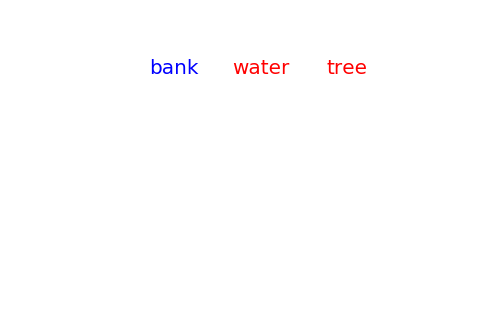

In [52]:
WordColoring(model, bow_water)

As expected both are blue as they belong to topic 0

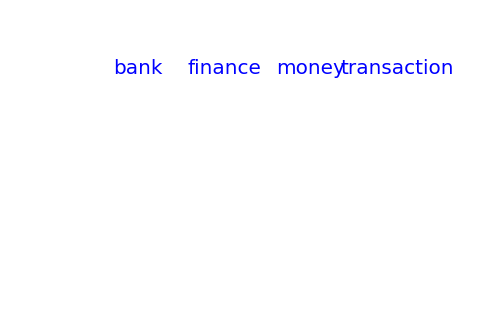

In [47]:
bow_finance = ['bank', 'finance', 'bank', 'transaction', 'money']
WordColoring(model, bow_finance)

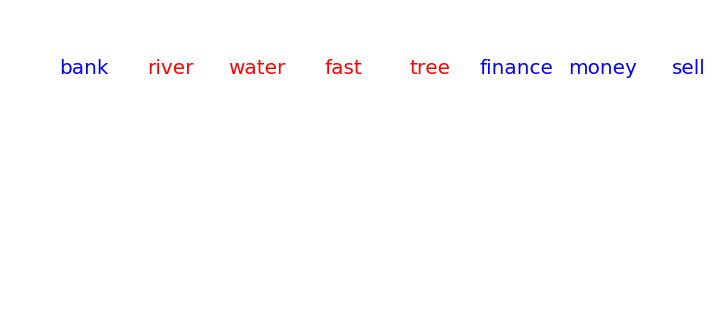

In [50]:
doc = ['bank', 'water', 'bank', 'finance', 'money','sell','river','fast','tree']
WordColoring(model, doc)

In [54]:
for word_id in dictionery:
    print(word_id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


### WORD COLORING A DICTIONERY

In [59]:
def WordColor(model, dictionery):
    
    word_topics = []
    
    for word_id in dictionery:
        word = str(dictionery[word_id])
        
        #get the term topics
        probs = model.get_term_topics(word)
        
        try:
            if probs[0][1] > probs[1][1]:
                word_topics.append((word_id, [0, 1]))
            else:
                word_topics.append((word_id, [1, 0]))
        except IndexError:
            word_topics.append((word_id, [probs[0][0]]))
            
    #color matching    
    colors = {1 : 'red', 0 : 'blue'}
        
    #set the figure
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])

    word_pos = 1 / len(doc)

    for word, topic in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word], horizontalalignment = 'center', 
                verticalalignment = 'center', color = colors[topic[0]], transform = ax.transAxes, fontsize = 20)
        word_pos += 0.2

    ax.set_axis_off()
    plt.show()      

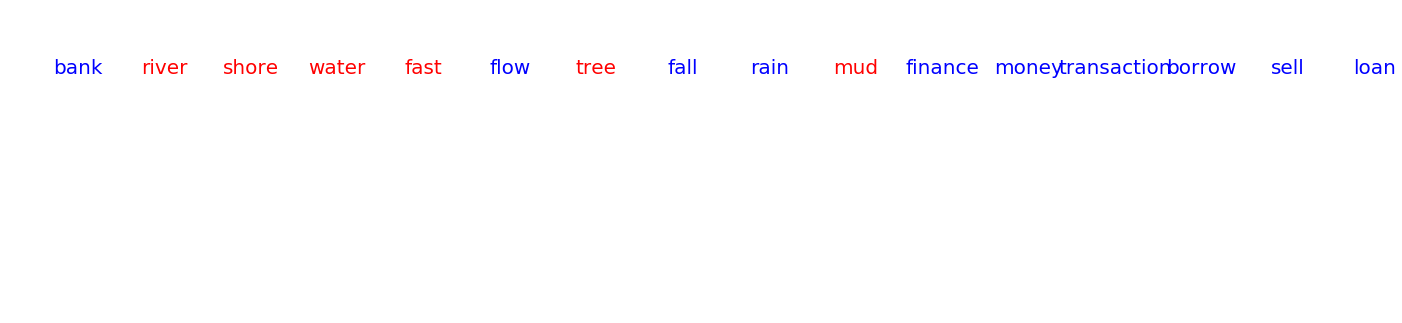

In [60]:
WordColor(model, dictionery)